# Feature Selection - part 1 

<hr>
<br>
<br>

<br>


Métodos: 

* Filtragem 
* Wrapper 
* Embedded 

<br>

<p align=center>
<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png" width="70%"></p>


<hr>

### Classification 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [2]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.drop('Unnamed: 32', axis=1, inplace=True)

X = data.drop('diagnosis', axis=1)
y= data['diagnosis']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=14)



label = LabelEncoder()

y_train = label.fit_transform(y_train)
y_test = label.transform(y_test)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

data.shape

(569, 32)

In [4]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2
import functools

In [5]:
k=10
f_class = functools.partial(f_classif)


# Filtro 
seletor = SelectKBest(score_func=f_class, k=k)

X_train2 = seletor.fit_transform(X_train, y_train)
X_test2 = seletor.transform(X_test)


# Random Forest 
mdl = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42)
mdl.fit(X_train2, y_train)
y_pred = mdl.predict(X_test2)

score = accuracy_score(y_test, y_pred)

print('K: {} | Acurácia: {}'.format(k, score))

K: 10 | Acurácia: 0.935672514619883


<hr>
<br>


#### Como escolher o melhor K ? 

* Colocar sempre apartir de 2, Testar sempre um grupo de features. 

In [6]:
f_class = functools.partial(f_classif)

resultados = []

for k in range(2, 32, 1):
    # Filtro 
    seletor = SelectKBest(score_func=f_class, k=k)

    X_train2 = seletor.fit_transform(X_train, y_train)
    X_test2 = seletor.transform(X_test)


    # Random Forest 
    mdl = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42)
    mdl.fit(X_train2, y_train)
    y_pred = mdl.predict(X_test2)

    score = accuracy_score(y_test, y_pred)
    resultados.append(score)

    print('K: {} | Acurácia: {}'.format(k, score))

K: 2 | Acurácia: 0.9064327485380117
K: 3 | Acurácia: 0.9239766081871345
K: 4 | Acurácia: 0.9181286549707602
K: 5 | Acurácia: 0.9239766081871345
K: 6 | Acurácia: 0.9298245614035088
K: 7 | Acurácia: 0.9298245614035088
K: 8 | Acurácia: 0.935672514619883
K: 9 | Acurácia: 0.9415204678362573
K: 10 | Acurácia: 0.935672514619883
K: 11 | Acurácia: 0.9415204678362573
K: 12 | Acurácia: 0.935672514619883
K: 13 | Acurácia: 0.935672514619883
K: 14 | Acurácia: 0.9415204678362573
K: 15 | Acurácia: 0.9298245614035088
K: 16 | Acurácia: 0.9415204678362573
K: 17 | Acurácia: 0.935672514619883
K: 18 | Acurácia: 0.9415204678362573
K: 19 | Acurácia: 0.9532163742690059
K: 20 | Acurácia: 0.9590643274853801
K: 21 | Acurácia: 0.9415204678362573
K: 22 | Acurácia: 0.9532163742690059
K: 23 | Acurácia: 0.9590643274853801
K: 24 | Acurácia: 0.9532163742690059
K: 25 | Acurácia: 0.9473684210526315
K: 26 | Acurácia: 0.9473684210526315
K: 27 | Acurácia: 0.9649122807017544
K: 28 | Acurácia: 0.9532163742690059
K: 29 | Acurác

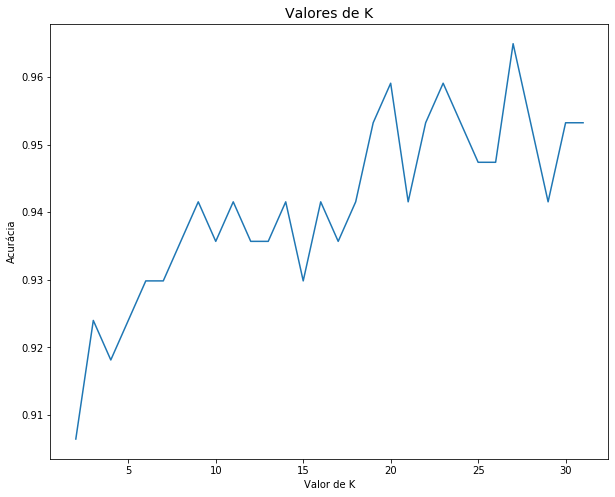

In [7]:
# avaliando valor de K 

plt.title('Valores de K', fontsize=14)
plt.xlabel('Valor de K')
plt.ylabel('Acurácia')
pd.Series(resultados, index=range(2,32,1)).plot(figsize=(10,8))

<br>

#### Quais as melhores features ? 

In [8]:
# Valor de K definido 
seletor = SelectKBest(score_func=f_class, k=27)
seletor.fit(X_train, y_train)

SelectKBest(k=27,
            score_func=functools.partial(<function f_classif at 0x000002219192ED38>))

In [9]:
# features selecionadas  
mask = seletor.get_support()
X.columns[mask]

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'fractal_dimension_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

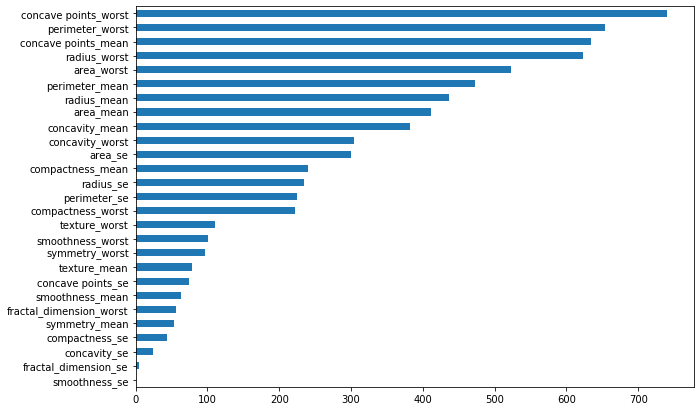

In [10]:
plt.figure(figsize=(10,7))
pd.Series(seletor.scores_, index=X.columns).sort_values().tail(27).plot.barh()

<hr>
<br>
<hr>
<br>
<br>

### Regression 

<hr>

In [11]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
data.drop(['id', 'date'], axis=1, inplace=True)

X = data.drop('price', axis=1)
y= data['price']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=14)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

data.shape

(21613, 19)

In [13]:
# Seleção por Correlações

from sklearn.feature_selection import SelectKBest, f_regression

# Corrigir erro da função f_regression 
import functools

In [14]:
# Seletor   

f_regressor = functools.partial(f_regression)
k=10

seletor = SelectKBest(score_func=f_regressor, k=k)

# Filtrando 
X_train2 = seletor.fit_transform(X_train, y_train)
X_test2 = seletor.transform(X_test)



# Random Forest 
mdl = RandomForestRegressor(n_estimators=100, max_depth=12, random_state=42)
mdl.fit(X_train2, y_train)
y_pred = mdl.predict(X_test2)

score = mean_absolute_error(y_test, y_pred)

print('K: {} | MAE: {}'.format(k, score))

K: 10 | MAE: 88712.50764396836


<br>

#### Como escolher o melhor K ? 

* Sempre utilizar grupos, K sempre apartir de 2. 

In [15]:
f_regressor = functools.partial(f_regression)

resultados = []

for k in range(2, 19, 1):
    # Filtro 
    seletor = SelectKBest(score_func=f_regressor, k=k)

    X_train2 = seletor.fit_transform(X_train, y_train)
    X_test2 = seletor.transform(X_test)


    # Random Forest 
    mdl = RandomForestRegressor(n_estimators=100, max_depth=12, random_state=42)
    mdl.fit(X_train2, y_train)
    y_pred = mdl.predict(X_test2)

    score = mean_absolute_error(y_test, y_pred)
    resultados.append(score)

    print('K: {} | MAE: {}'.format(k, score))

K: 2 | MAE: 157230.084234434
K: 3 | MAE: 150508.4130788614
K: 4 | MAE: 147509.3043470411
K: 5 | MAE: 143984.43824507965
K: 6 | MAE: 140766.49443989585
K: 7 | MAE: 140537.16932394513
K: 8 | MAE: 90431.62902057325
K: 9 | MAE: 90189.12321435842
K: 10 | MAE: 88712.50764396836
K: 11 | MAE: 88036.7317662987
K: 12 | MAE: 87794.56706442012
K: 13 | MAE: 85379.16963907931
K: 14 | MAE: 84885.13112146535
K: 15 | MAE: 81177.9358468392
K: 16 | MAE: 76514.81395611787
K: 17 | MAE: 76209.0381503357
K: 18 | MAE: 70853.18131351922


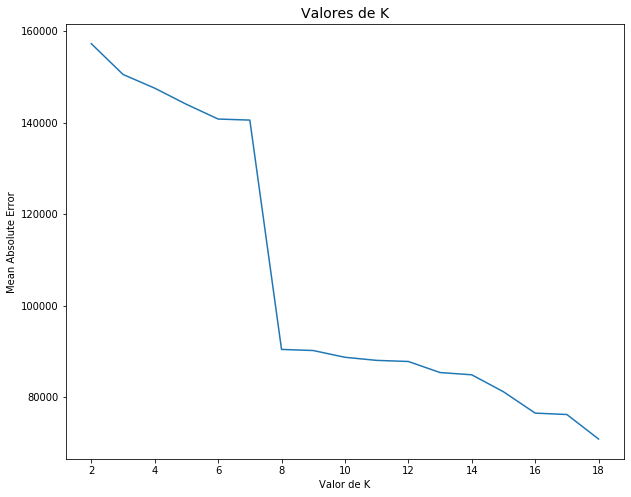

In [16]:
# avaliando valor de K

plt.title('Valores de K', fontsize=14)
plt.xlabel('Valor de K')
plt.ylabel('Mean Absolute Error')
pd.Series(resultados, index=range(2,19,1)).plot(figsize=(10,8))

<br>

#### Quais as melhores features ? 

In [17]:
# Com o K definido

seletor = SelectKBest(score_func=f_regressor, k=7)
seletor.fit(X_train, y_train)

SelectKBest(k=7,
            score_func=functools.partial(<function f_regression at 0x0000022191933558>))

In [18]:
# inserir mascára 
mask = seletor.get_support()
X.columns[mask]

Index(['bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15'],
      dtype='object')

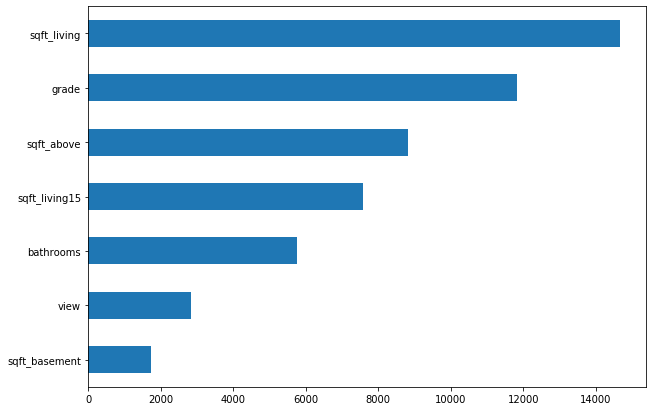

In [19]:
# Visualizando features
plt.figure(figsize=(10,7))
pd.Series(seletor.scores_, index=X.columns).sort_values().tail(7).plot.barh()